# Second hand car price prediction regression model.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Shubham\Downloads\Excel\Car price prediction\train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
#lowest price of car = 0.44 lakhs
#mean price of car = 9.5 lakhs
#highest price of car = 1.6 cr

## Data cleaning

In [5]:
df.isnull().sum()                                       #New_price column drop, other null value rows drop(100 rows out of 6k)

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
df1=df.drop(['New_Price','Unnamed: 0','Location'],axis=1)
df1

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [7]:
df2=df1.dropna()
len(df2)

5975

In [8]:
df2['Owner_Type'].value_counts(), df2['Fuel_Type'].value_counts(), df2['Transmission'].value_counts()

(First             4903
 Second             953
 Third              111
 Fourth & Above       8
 Name: Owner_Type, dtype: int64,
 Diesel    3195
 Petrol    2714
 CNG         56
 LPG         10
 Name: Fuel_Type, dtype: int64,
 Manual       4266
 Automatic    1709
 Name: Transmission, dtype: int64)

In [9]:
df2[['mileage','units']]=df2['Mileage'].str.split(expand=True)                # expand=true for different columns split

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
df2[['engine','CC']]=df2['Engine'].str.split(expand=True)
df2[['power','bhp']]=df2['Power'].str.split(expand=True)     

In [11]:
df3=df2.drop(['Mileage','Engine','Power','CC','units','bhp'],axis=1)
df3

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,5.0,1.75,26.6,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2
2,Honda Jazz V,2011,46000,Petrol,Manual,First,5.0,4.50,18.2,1199,88.7
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,5.0,4.75,28.4,1248,74
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,5.0,4.00,24.4,1120,71
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,8.0,2.90,14.0,2498,112
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,5.0,2.65,18.9,998,67.1


In [12]:
df_brand=df3['Name'].str.split(expand=True)  
df_brand[0].value_counts()    

Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: 0, dtype: int64

In [13]:
df_brand1=df_brand[0]
highestquality=['Mercedes-Benz','BMW','Audi','Porsche','Bentley','Lamborghini','Jaguar','Volvo']
mediumquality=['Honda','Toyota','Ford','Skoda','Land','Mitsubishi','Mini','Jeep','Force','ISUZU','Smart']
budgetquality=['Maruti','Hyundai','Volkswagen','Mahindra','Tata','Renault','Chevrolet','Nissan','Fiat','Datsun','Ambassador'] 
df3a=pd.concat([df3,df_brand1],axis=1)
df3b=df3a.drop(['Name'],axis=1)
df3b

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,0
0,2010,72000,CNG,Manual,First,5.0,1.75,26.6,998,58.16,Maruti
1,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2,Hyundai
2,2011,46000,Petrol,Manual,First,5.0,4.50,18.2,1199,88.7,Honda
3,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76,Maruti
4,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8,Audi
...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,5.0,4.75,28.4,1248,74,Maruti
6015,2015,100000,Diesel,Manual,First,5.0,4.00,24.4,1120,71,Hyundai
6016,2012,55000,Diesel,Manual,Second,8.0,2.90,14.0,2498,112,Mahindra
6017,2013,46000,Petrol,Manual,First,5.0,2.65,18.9,998,67.1,Maruti


In [14]:
df3b[0].replace(["Porsche","Bentley","Lamborghini",'Mercedes-Benz','BMW','Audi','Jaguar','Volvo'], 'highestquality',inplace=True)
df3b[0].replace(['Honda','Toyota','Ford','Skoda','Land','Mitsubishi','Mini','Jeep','Force','ISUZU','Smart','Isuzu'], 'mediumquality',inplace=True)
df3b[0].replace(['Maruti','Hyundai','Volkswagen','Mahindra','Tata','Renault','Chevrolet','Nissan','Fiat','Datsun','Ambassador'], 'budgetquality',inplace=True)

In [15]:
df3b[0].value_counts()

budgetquality     3465
mediumquality     1613
highestquality     897
Name: 0, dtype: int64

In [16]:
df3b

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,0
0,2010,72000,CNG,Manual,First,5.0,1.75,26.6,998,58.16,budgetquality
1,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2,budgetquality
2,2011,46000,Petrol,Manual,First,5.0,4.50,18.2,1199,88.7,mediumquality
3,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76,budgetquality
4,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8,highestquality
...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,5.0,4.75,28.4,1248,74,budgetquality
6015,2015,100000,Diesel,Manual,First,5.0,4.00,24.4,1120,71,budgetquality
6016,2012,55000,Diesel,Manual,Second,8.0,2.90,14.0,2498,112,budgetquality
6017,2013,46000,Petrol,Manual,First,5.0,2.65,18.9,998,67.1,budgetquality


In [17]:
brand=pd.get_dummies(df3b[0], drop_first = True)    
brand

,highestquality,mediumquality
0,0,0
1,0,0
2,0,1
3,0,0
4,1,0
...,...,...
6014,0,0
6015,0,0
6016,0,0
6017,0,0


In [18]:
df3c= pd.concat([df3b, brand], axis = 1)

In [19]:
df3=df3c.drop([0],axis=1)
df3

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,highestquality,mediumquality
0,2010,72000,CNG,Manual,First,5.0,1.75,26.6,998,58.16,0,0
1,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2,0,0
2,2011,46000,Petrol,Manual,First,5.0,4.50,18.2,1199,88.7,0,1
3,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76,0,0
4,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,5.0,4.75,28.4,1248,74,0,0
6015,2015,100000,Diesel,Manual,First,5.0,4.00,24.4,1120,71,0,0
6016,2012,55000,Diesel,Manual,Second,8.0,2.90,14.0,2498,112,0,0
6017,2013,46000,Petrol,Manual,First,5.0,2.65,18.9,998,67.1,0,0


In [20]:
df3['Years_usage']=2021-df['Year']
df4=df3.drop(['Year'],axis=1)

In [21]:
df4

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,mileage,engine,power,highestquality,mediumquality,Years_usage
0,72000,CNG,Manual,First,5.0,1.75,26.6,998,58.16,0,0,11
1,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2,0,0,6
2,46000,Petrol,Manual,First,5.0,4.50,18.2,1199,88.7,0,1,10
3,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76,0,0,9
4,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,Diesel,Manual,First,5.0,4.75,28.4,1248,74,0,0,7
6015,100000,Diesel,Manual,First,5.0,4.00,24.4,1120,71,0,0,6
6016,55000,Diesel,Manual,Second,8.0,2.90,14.0,2498,112,0,0,9
6017,46000,Petrol,Manual,First,5.0,2.65,18.9,998,67.1,0,0,8


In [22]:
fuel_type = pd.get_dummies(df4['Fuel_Type'], drop_first = True)      
fuel_type 

,Diesel,LPG,Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
6014,1,0,0
6015,1,0,0
6016,1,0,0
6017,0,0,1


In [23]:
df5= pd.concat([df4, fuel_type], axis = 1)
df5=df5.drop(['Fuel_Type'],axis=1)
df5

,Kilometers_Driven,Transmission,Owner_Type,Seats,Price,mileage,engine,power,highestquality,mediumquality,Years_usage,Diesel,LPG,Petrol
0,72000,Manual,First,5.0,1.75,26.6,998,58.16,0,0,11,0,0,0
1,41000,Manual,First,5.0,12.50,19.67,1582,126.2,0,0,6,1,0,0
2,46000,Manual,First,5.0,4.50,18.2,1199,88.7,0,1,10,0,0,1
3,87000,Manual,First,7.0,6.00,20.77,1248,88.76,0,0,9,1,0,0
4,40670,Automatic,Second,5.0,17.74,15.2,1968,140.8,1,0,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,Manual,First,5.0,4.75,28.4,1248,74,0,0,7,1,0,0
6015,100000,Manual,First,5.0,4.00,24.4,1120,71,0,0,6,1,0,0
6016,55000,Manual,Second,8.0,2.90,14.0,2498,112,0,0,9,1,0,0
6017,46000,Manual,First,5.0,2.65,18.9,998,67.1,0,0,8,0,0,1


In [24]:
transmission=pd.get_dummies(df5['Transmission'], drop_first = True)     
df6= pd.concat([df5, transmission], axis = 1)
df6=df6.drop(['Transmission'],axis=1)
df6

,Kilometers_Driven,Owner_Type,Seats,Price,mileage,engine,power,highestquality,mediumquality,Years_usage,Diesel,LPG,Petrol,Manual
0,72000,First,5.0,1.75,26.6,998,58.16,0,0,11,0,0,0,1
1,41000,First,5.0,12.50,19.67,1582,126.2,0,0,6,1,0,0,1
2,46000,First,5.0,4.50,18.2,1199,88.7,0,1,10,0,0,1,1
3,87000,First,7.0,6.00,20.77,1248,88.76,0,0,9,1,0,0,1
4,40670,Second,5.0,17.74,15.2,1968,140.8,1,0,8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,First,5.0,4.75,28.4,1248,74,0,0,7,1,0,0,1
6015,100000,First,5.0,4.00,24.4,1120,71,0,0,6,1,0,0,1
6016,55000,Second,8.0,2.90,14.0,2498,112,0,0,9,1,0,0,1
6017,46000,First,5.0,2.65,18.9,998,67.1,0,0,8,0,0,1,1


In [25]:
owner_Type=pd.get_dummies(df6['Owner_Type'], drop_first = True)     
df7= pd.concat([df6, owner_Type], axis = 1)
df7=df7.drop(['Owner_Type'],axis=1)
df7

,Kilometers_Driven,Seats,Price,mileage,engine,power,highestquality,mediumquality,Years_usage,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,72000,5.0,1.75,26.6,998,58.16,0,0,11,0,0,0,1,0,0,0
1,41000,5.0,12.50,19.67,1582,126.2,0,0,6,1,0,0,1,0,0,0
2,46000,5.0,4.50,18.2,1199,88.7,0,1,10,0,0,1,1,0,0,0
3,87000,7.0,6.00,20.77,1248,88.76,0,0,9,1,0,0,1,0,0,0
4,40670,5.0,17.74,15.2,1968,140.8,1,0,8,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,5.0,4.75,28.4,1248,74,0,0,7,1,0,0,1,0,0,0
6015,100000,5.0,4.00,24.4,1120,71,0,0,6,1,0,0,1,0,0,0
6016,55000,8.0,2.90,14.0,2498,112,0,0,9,1,0,0,1,0,1,0
6017,46000,5.0,2.65,18.9,998,67.1,0,0,8,0,0,1,1,0,0,0


In [26]:
df7.info()                                          #converting object datatype to float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  5975 non-null   int64  
 1   Seats              5975 non-null   float64
 2   Price              5975 non-null   float64
 3   mileage            5975 non-null   object 
 4   engine             5975 non-null   object 
 5   power              5975 non-null   object 
 6   highestquality     5975 non-null   uint8  
 7   mediumquality      5975 non-null   uint8  
 8   Years_usage        5975 non-null   int64  
 9   Diesel             5975 non-null   uint8  
 10  LPG                5975 non-null   uint8  
 11  Petrol             5975 non-null   uint8  
 12  Manual             5975 non-null   uint8  
 13  Fourth & Above     5975 non-null   uint8  
 14  Second             5975 non-null   uint8  
 15  Third              5975 non-null   uint8  
dtypes: float64(2), int64(2),

In [27]:
df7['power'].value_counts()

74        235
98.6      131
73.9      125
140       123
78.9      111
         ... 
201         1
199.3       1
95          1
152.88      1
181.04      1
Name: power, Length: 371, dtype: int64

In [28]:
df7['mileage']= df7['mileage'].astype(float)   

In [29]:
df7['engine']= df7['engine'].astype(float)  

In [30]:
df_null=df7['power']=='null' 
df_null.value_counts() 

False    5872
True      103
Name: power, dtype: int64

In [31]:
df7.drop(df7[df7['power'] == 'null'].index, inplace = True)                #dropping rows with 'null' 

In [32]:
df7['power']= df7['power'].astype(float)   

In [33]:
df7

,Kilometers_Driven,Seats,Price,mileage,engine,power,highestquality,mediumquality,Years_usage,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,72000,5.0,1.75,26.60,998.0,58.16,0,0,11,0,0,0,1,0,0,0
1,41000,5.0,12.50,19.67,1582.0,126.20,0,0,6,1,0,0,1,0,0,0
2,46000,5.0,4.50,18.20,1199.0,88.70,0,1,10,0,0,1,1,0,0,0
3,87000,7.0,6.00,20.77,1248.0,88.76,0,0,9,1,0,0,1,0,0,0
4,40670,5.0,17.74,15.20,1968.0,140.80,1,0,8,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,5.0,4.75,28.40,1248.0,74.00,0,0,7,1,0,0,1,0,0,0
6015,100000,5.0,4.00,24.40,1120.0,71.00,0,0,6,1,0,0,1,0,0,0
6016,55000,8.0,2.90,14.00,2498.0,112.00,0,0,9,1,0,0,1,0,1,0
6017,46000,5.0,2.65,18.90,998.0,67.10,0,0,8,0,0,1,1,0,0,0


In [34]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df7.columns
df7a = scaler.fit_transform(df7)
scaled_df = pd.DataFrame(df7a, columns=names)
scaled_df.head()

,Kilometers_Driven,Seats,Price,mileage,engine,power,highestquality,mediumquality,Years_usage,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,0.011051,0.375,0.008210,0.793083,0.069594,0.045569,0.0,0.0,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.006282,0.375,0.075583,0.586464,0.178266,0.174971,0.0,0.0,0.190476,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.007051,0.375,0.025445,0.542636,0.106997,0.103652,0.0,1.0,0.380952,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.013359,0.625,0.034846,0.619261,0.116115,0.103766,0.0,0.0,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.006231,0.375,0.108423,0.453190,0.250093,0.202739,1.0,0.0,0.285714,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
### Data is ready for feature selection. 

## Feature selection

In [36]:
### All data should be in float. 

<AxesSubplot:>

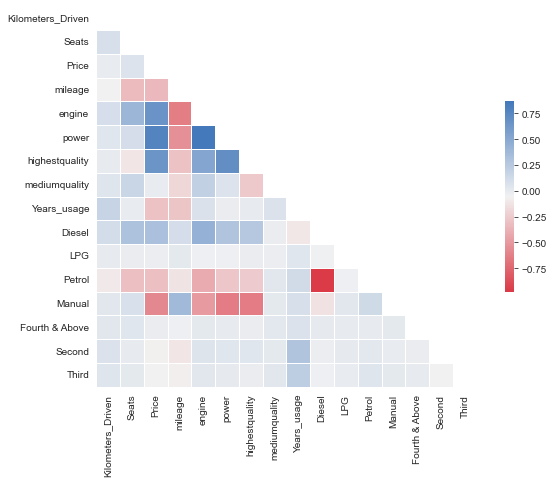

In [37]:
corr = df7.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')   
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax) 

<AxesSubplot:>

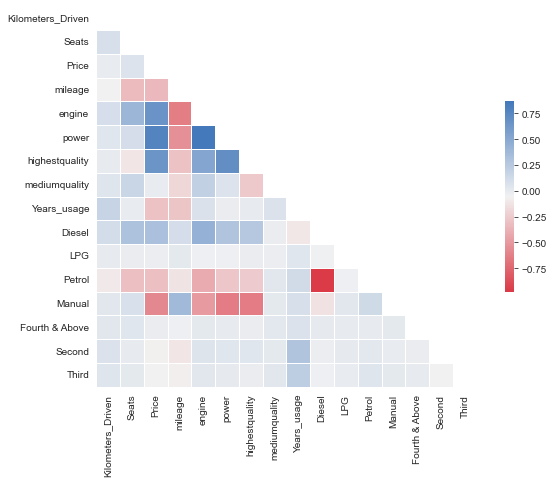

In [38]:
corr = scaled_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')   
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax) 

#### High correlation with power, engine; manual/automatic. Third, second, fourth&above columns can be removed. 

In [39]:
df8=df7.drop(['Fourth & Above','Second','Third'],axis=1)

In [40]:
from sklearn.model_selection import train_test_split

### Model accuracy with Normalisation

In [41]:
X = scaled_df.drop(['Price'], axis=1)
y = scaled_df.Price

### 1. Linear model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept= True, normalize= True) 
reg.fit(X_train,y_train)
reg.score(X_train,y_train),reg.score(X_test,y_test)

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(0.716085466439229, 0.7100862721931431)

In [43]:
## gridsearchcv less effective in linear regression

### 2. KNRegressor

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(X_train, y_train)
neigh.score(X_train, y_train), neigh.score(X_test, y_test)

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


(0.8892118687572251, 0.8877905923269781)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params)
model.fit(X_train,y_train)
model.best_params_

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid featur

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


{'n_neighbors': 6}

In [46]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### 3. Random forest

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor() 
rf_reg.fit(X_train, y_train)
rf_reg.score(X_train,y_train), rf_reg.score(X_test,y_test)

(0.9828893338975095, 0.8936327881143196)

In [48]:
forest_params = [{'max_depth': list(range(3, 15))}]
clf = GridSearchCV(rf_reg, forest_params, cv = 5,scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _

{'max_depth': 3}


### 4. Decision tree

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)              
from sklearn.tree import DecisionTreeRegressor
regressor_3 = DecisionTreeRegressor(max_depth=7)
regressor_3.fit(X_train, y_train)
regressor_3.score(X_train, y_train), regressor_3.score(X_test, y_test)

(0.9283781522876402, 0.7689758512832934)

In [50]:
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(regressor_3, tree_para)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'max_depth': 6}


[Text(170.97468750000002, 203.85, 'X[4] <= 0.248\nsquared_error = 0.005\nsamples = 4697\nvalue = 0.057'),
 Text(84.4846875, 176.67000000000002, 'X[3] <= 0.248\nsquared_error = 0.001\nsamples = 3851\nvalue = 0.034'),
 Text(40.629375, 149.49, 'X[7] <= 0.262\nsquared_error = 0.0\nsamples = 3291\nvalue = 0.029'),
 Text(19.87875, 122.31, 'X[4] <= 0.138\nsquared_error = 0.0\nsamples = 1860\nvalue = 0.037'),
 Text(11.16, 95.13, 'X[4] <= 0.075\nsquared_error = 0.0\nsamples = 1525\nvalue = 0.032'),
 Text(5.58, 67.94999999999999, 'X[4] <= 0.058\nsquared_error = 0.0\nsamples = 364\nvalue = 0.02'),
 Text(2.79, 40.77000000000001, 'X[3] <= 0.016\nsquared_error = 0.0\nsamples = 141\nvalue = 0.016'),
 Text(1.395, 13.590000000000003, 'squared_error = 0.0\nsamples = 14\nvalue = 0.011'),
 Text(4.1850000000000005, 13.590000000000003, 'squared_error = 0.0\nsamples = 127\nvalue = 0.017'),
 Text(8.370000000000001, 40.77000000000001, 'X[3] <= 0.143\nsquared_error = 0.0\nsamples = 223\nvalue = 0.022'),
 Text(6

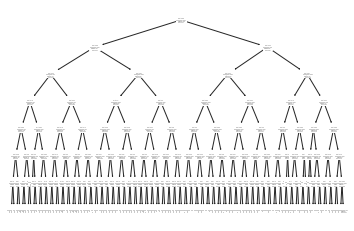

In [51]:
from sklearn import tree
tree.plot_tree(regressor_3)

### 5. Neural network

In [52]:
from sklearn.neural_network import MLPRegressor                          #sk learn neural network
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
regr = MLPRegressor(max_iter=500).fit(X_train, y_train)
regr.score(X_train, y_train),regr.score(X_test, y_test)

(0.8455021518141687, 0.852239758260031)

In [53]:
### Neural network works well with normalisation. 

### Model accuracy without Normalisation

In [54]:
X = df8.drop(['Price'], axis=1)
y = df8.Price

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn import linear_model 
reg = linear_model.LinearRegression() 
reg.fit(X_train,y_train)
reg.score(X_train,y_train),reg.score(X_test,y_test)

(0.7064970231515841, 0.7511890675470169)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=9) 
neigh.fit(X_train, y_train)
neigh.score(X_train, y_train), neigh.score(X_test, y_test)

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


(0.6516537310730285, 0.5304559169095626)

#### KNregressor requires normalisation as it is distance based model.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_train,y_train), rf_reg.score(X_test,y_test)

(0.9827966554410082, 0.909611718579874)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.tree import DecisionTreeRegressor
regressor_3 = DecisionTreeRegressor()
regressor_3.fit(X_train, y_train)
regressor_3.score(X_train, y_train), regressor_3.score(X_test, y_test)

(0.9997979853290019, 0.8130843689593985)

In [ ]:
from dtreeviz.trees import *
viz = dtreeviz(regressor_3, 
               x_data=X_train,
               y_data=y_train,
               target_name='Price', 
               feature_names=X_train.columns, 
               class_names=list(y_train), 
               title="Car price prediction")
viz

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(regressor_3, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

### KNregressor, random forest model with normalisation showing better results than linear regression. However random forest overfits. 